In [5]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statistics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Clustering Solutions
Add your code here for the clustering question

### (a)

### (b)

In [6]:
# load training dataset
dataSet = pd.read_csv('../heart_disease_data/train_dataset.csv')

In [7]:
# extract features from the training dataset
numericalFeatures = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
features = dataSet[numericalFeatures].copy()

In [8]:
# apply standard scaling
scaler = StandardScaler()
# fit scaler befor transforming the data
scaler.fit(features)
scaledData = scaler.transform(features)

In [10]:
# apply kMeans Clustering with 3 clusters and with parameters init='k-means++' and random_state=42
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++').fit(scaledData)

In [12]:
# Size and centroid of the cohorts
print("Result Clustering KMeans")

cluster_sizes = [sum(kmeans.labels_ == i) for i in range(kmeans.n_clusters)]

for i in range(kmeans.n_clusters):
    print("Cluster :", i)
    print("Size: ", cluster_sizes[i])
    print("Centroid: ", kmeans.cluster_centers_[i])
    print()

Result Clustering KMeans
Cluster : 0
Size:  135
Centroid:  [ 0.44471616 -0.24019088 -1.65071467 -0.75435837 -0.12144594]

Cluster : 1
Size:  296
Centroid:  [-0.6929129  -0.33317482  0.30151364  0.7089452  -0.55293581]

Cluster : 2
Size:  259
Centroid:  [ 0.55049698  0.49953704  0.51418188 -0.40839659  0.6856641 ]



### (c)

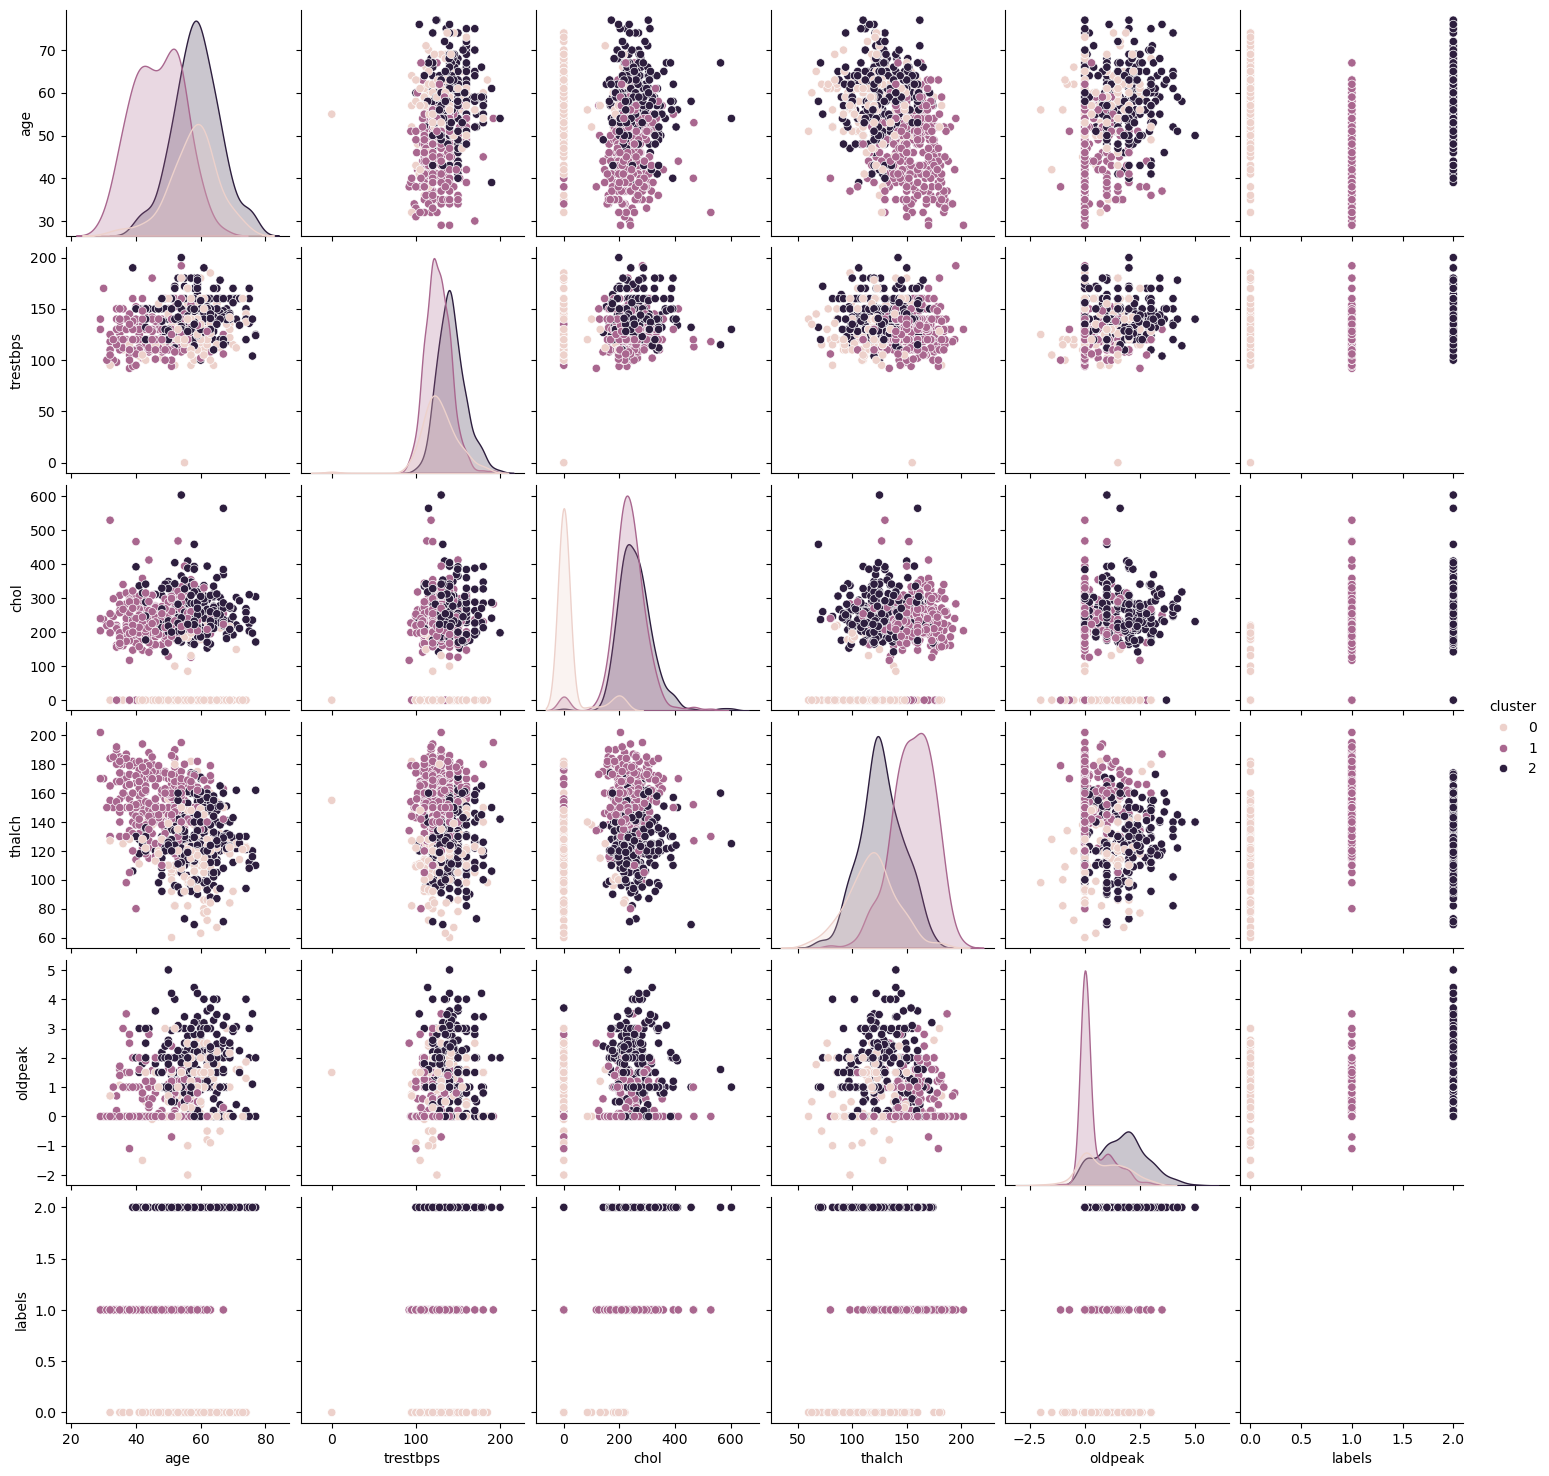

In [38]:
# add labels to dataframe
features['cluster'] = kmeans.labels_
# plot clusters
fig = sns.pairplot(features, hue='cluster')

In [14]:
# save fig as png
fig.savefig("clustersQuestiong5.png")

### (d)

In [16]:
# load test data
testData = pd.read_csv('../heart_disease_data/train_dataset.csv')

In [19]:
# extract features from test data
testFeatures = testData[numericalFeatures].copy()

# apply standard scaling
scaledTestData = scaler.transform(testFeatures)

In [35]:
# define num (target feature) value to each cluster
dataSet['cluster'] = kmeans.labels_
cluster_modes = {}
for cluster, group in dataSet.groupby('cluster'):
    cluster_modes[cluster] = group['num'].mode().iloc[0].item()

for x in cluster_modes:
    print("Cluster :", x)
    print("cluster num: ", cluster_modes[x])

Cluster : 0
cluster num:  1
Cluster : 1
cluster num:  0
Cluster : 2
cluster num:  1


In [39]:
# predict clusters testdata
predictedCluster = kmeans.predict(testFeatures)

# derive num (target feature) value from cluster predicition
predictedNum = [cluster_modes[cluster] for cluster in predictedCluster]

/home/jojo/.conda/envs/env-ids/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [40]:
# confusion matrix for testdata
confusionMatrix = confusion_matrix(testData['num'], predictedNum)
print(confusionMatrix)

[[ 24 296   0   0   0]
 [ 13 180   0   0   0]
 [  7  74   0   0   0]
 [  2  77   0   0   0]
 [  0  17   0   0   0]]


In [42]:
# calculate accuracy for test data
accuracy = accuracy_score(testData['num'], predictedNum)
print(accuracy)

0.2956521739130435
